# Chapter 02 - Model Evaluation for Forecasting

You need objective measures of performance to decide which forecast to retain as your actual forecast.

Let’s look at a purely hypothetical example with stock prices per month of the year 2020 and the forecast that someone has made for this. Assume that this forecast has been made in December 2019 for the complete year and that it has not been updated since.

You can already see that there is quite some difference between the actual values and the forecasted values. But that happens. Let’s start with getting the data into Python and plotting the two lines:

## Listing 2-1.Getting the stock data example into Python.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

period = ['Januray', 'February', 'March',
         'April', 'May', 'June',
         'July', 'August', 'September',
         'October', 'November', 'December']

actual = [35, 35, 10,
          5, 8, 10,
          15, 20, 23,
          21, 22, 25]

forecast = [30, 31, 30,
              10, 12, 17,
              18, 27, 29,
              24, 23, 22]

data = pd.DataFrame({
    'period': period,
    'actual': actual,
    'forecast': forecast
})

ax = data.plot.line(x='period')
ax.set_title('Forecast vs Actual', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


Now the next simple step is to compute the differences between each forecasted
value and each actual value
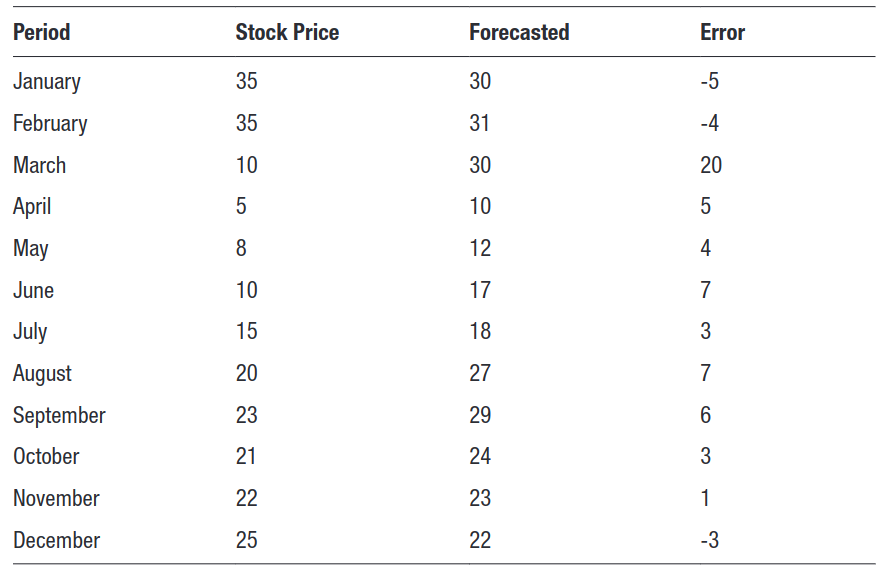

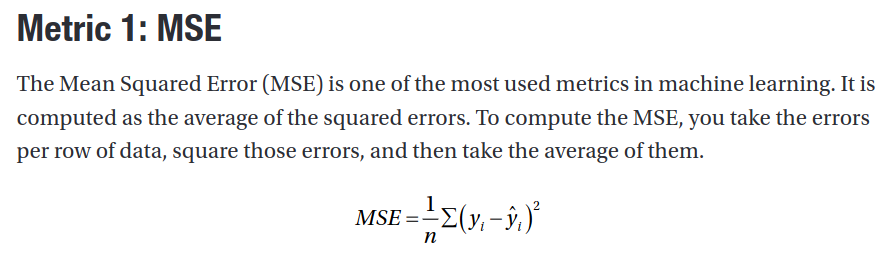

You can compute it in Python using the scikit-learn library, as is done in Listing 2-2.


## Listing 2-2. Computing the Mean Squared Error in Python.

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(data['actual'], data['forecast']))


For the current example, this gives a MSE of 53.7.
The logic behind this error metric is multifold. First, you can understand the reason that the squared errors are used rather than the original errors, as it would be impossible to sum the original errors. Since there are positive and negative values in the original errors, they would cancel each other out. Imagine a case with one large negative error and one large positive error: the sum of the two errors might be close to zero, which is clearly wrong. The square of a value is always positive, which is why this is one possibility
to counter this.

A second part of the formula that you can understand is that it functions as an
average. You take the sum of all values and divide by the number of observations. In the MSE, you take the average of the squared errors.
The MSE error metric is great for comparing different models on the same dataset. The scale of the MSE will be the same for each model applied to the same dataset. However, the scale of the metric is not very intuitive, which makes it difficult to interpret outside of benchmarking multiple models.

The MSE is an error metric, so it should be interpreted as follows: the smaller the error, the better the model. It is not possible to convert this into an accuracy measure, because of the lack of a fixed scale of the metric. There are no upper bounds to the error, so it should really be used for comparison only.

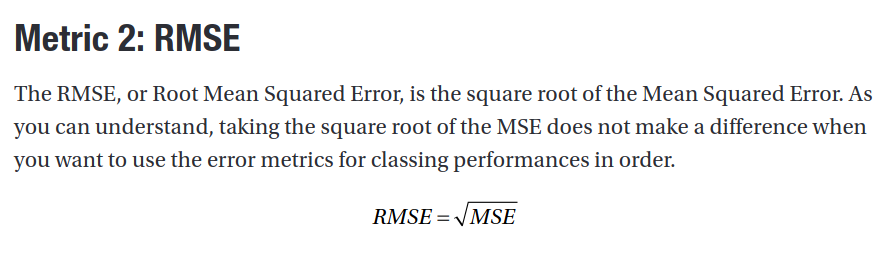

## Listing 2-3. Computing the Root Mean Squared Error in Python.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(data['actual'], data['forecast'])))


As the RMSE is an error measure, a lower RMSE indicates a better model.
Although the RMSE is more intuitively understandable, its scale is still dependent on the actual values. This makes it impossible to compare the RMSE values of different datasets with one another, just like the MSE.

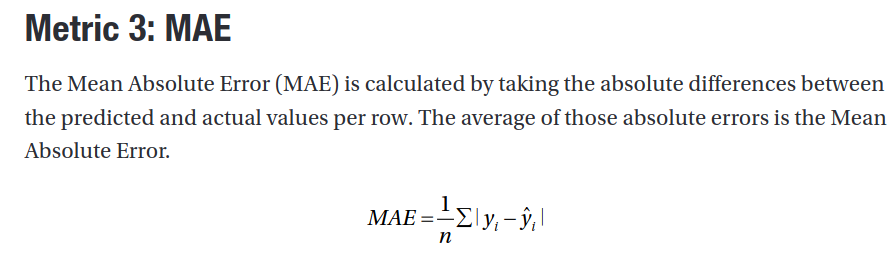

## Listing 2-4.Computing the Mean Absolute Error in Python.

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(data['actual'], data['forecast']))


The MAE takes the absolute values of the errors before averaging. Taking the average of absolute errors is a way to make sure that summing the errors will not make them cancel each other out.
You have seen the MSE using the square of the errors to avoid this, and the MAE is an alternative to this. The MAE has a more intuitive formula: it is the error metric that most people intuitively come up with. Yet the RMSE is generally favored over the MAE.

Since the RMSE uses squares rather than absolute values, the RMSE is easier to
use in mathematical computations that demand to take derivatives. The derivative of squared errors is much easier to compute than the derivative of absolute errors. Since the derivative is a much used function in optimization and minimization, this is an important criterion.

The interpretation of the MAE is comparable to the interpretation of the RMSE. They both yield scores that are in the same range of values as the actual values. There will always be a difference in the MAE and the MSE. When using the squared errors, if one of the individual errors is very high, this value may weigh stronger in the total evaluation.
Yet there is not a definite way to judge whether one of the error measures is better or worse than the other.
You can compute the Mean Absolute Error in Python using the code in Listing 2-4.
You should obtain an MAE of 5.67.

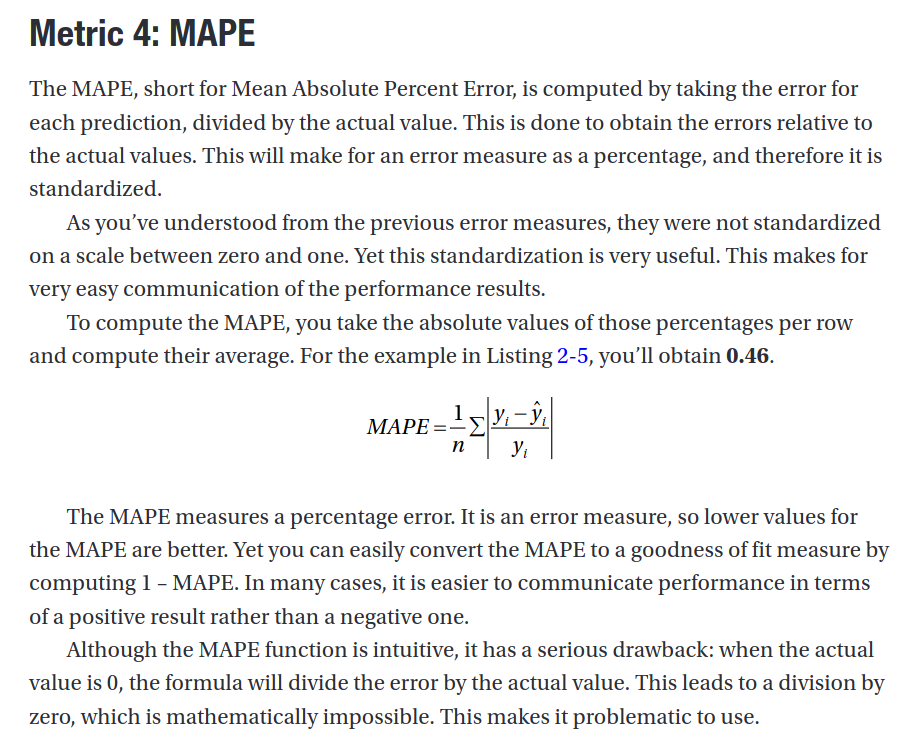

## Listing 2-4. Computing the Mean Absolute Percent Error in Python.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data['actual'], data['forecast']))


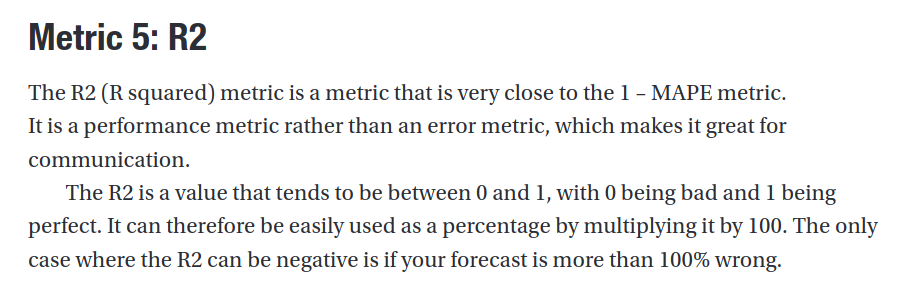

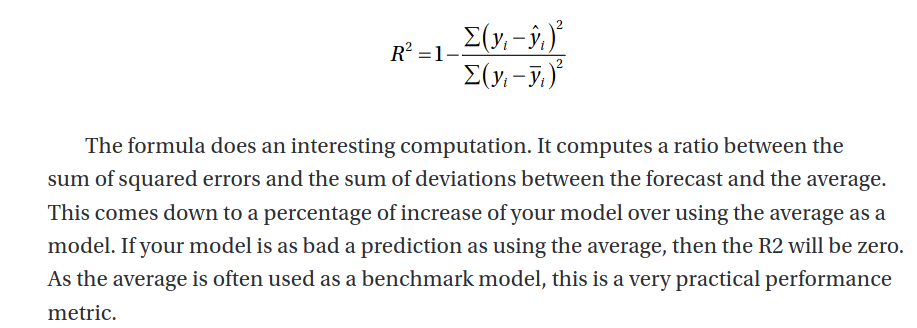

## Listing 2-6. Computing the R2 in Python.

In [ ]:
from sklearn.metrics import r2_score
r2_score(data['actual'], data['forecast'])


**Model Evaluation Strategies**

Strategy 1: Train-Test Split

Strategy 2: Train-Validation-Test Split

Strategy 3: Cross-Validation for Forecasting

## Listing 2-7. Train Test Split in Python.

In [ ]:
from sklearn.model_selection import train_test_split
y = data['actual']
train, test = train_test_split(y, test_size=0.3, shuffle=False)
forecast = train.mean() # forecast is 17.25
train = pd.DataFrame(train)
train['forecast'] = forecast
train_error = mean_squared_error(train['actual'], train['forecast'])

test = pd.DataFrame(test)
test['forecast'] = forecast
test_error = mean_squared_error(test['actual'], test['forecast'])
print(train_error, test_error)


## Listing 2-8. Train Validation Test Split in Python.

In [ ]:
# Splitting into 70% train, 15% validation and 15% test
train, test = train_test_split(data['actual'], test_size = 0.3, shuffle = False, random_state=12345)
val, test = train_test_split(test, test_size = 0.5, shuffle = False, random_state=12345)

# Fit (estimate) the two models on the train data
forecast_mean = train.mean() # 17.25
forecast_median = train.median() # 12.5

# Compute MSE on validation data for both models
val = pd.DataFrame(val)

val['forecast_mean'] = forecast_mean
val['forecast_median'] = forecast_median

mean_val_mse = mean_squared_error(val['actual'], val['forecast_mean'])
median_val_mse = mean_squared_error(val['actual'], val['forecast_median'])

# You observe the following validation mse: mean mse: 23.56, median mse: 91.25
print(mean_val_mse, median_val_mse)

# The best performance is the mean model, so verify its error on test data
test = pd.DataFrame(test)
test['forecast_mean'] = forecast_mean

mean_test_mse = mean_squared_error(test['actual'], test['forecast_mean'])

# You observe a test mse of 41.3125, almost double the validation mse
print(mean_test_mse)


## K-fold cross-validation


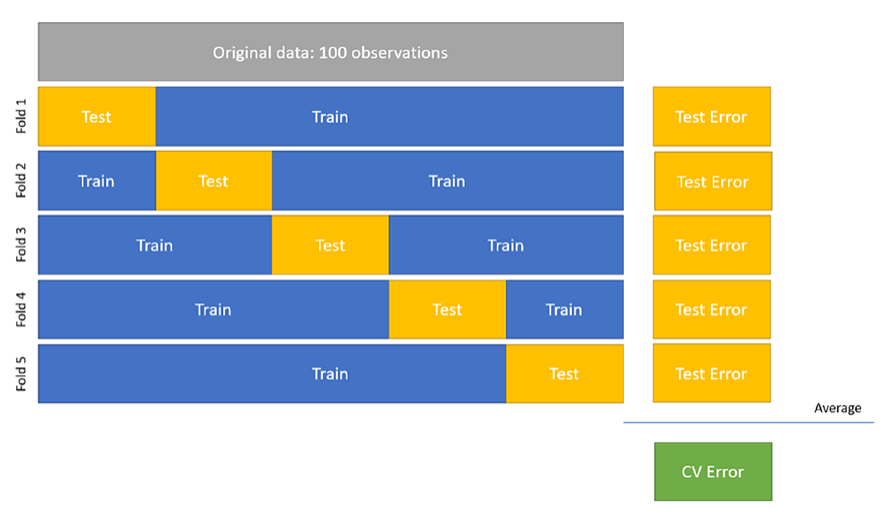

## Listing 2-9. K-fold cross-validation in Python.

1.   Listeneintrag
2.   Listeneintrag



In [ ]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

errors = []
for train_index, test_index in kf.split(data):
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]

    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)

print(np.mean(errors))


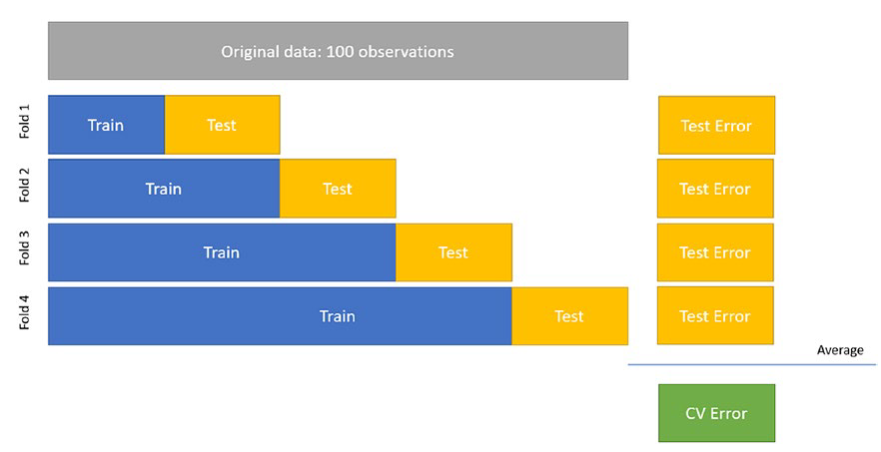

## Time series cross-validation

## Listing 2-10. Time Series Cross-Valdiation in Python.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

errors = []
for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]
    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)

print(np.mean(errors))


## Rolling Time Series Cross-Validation

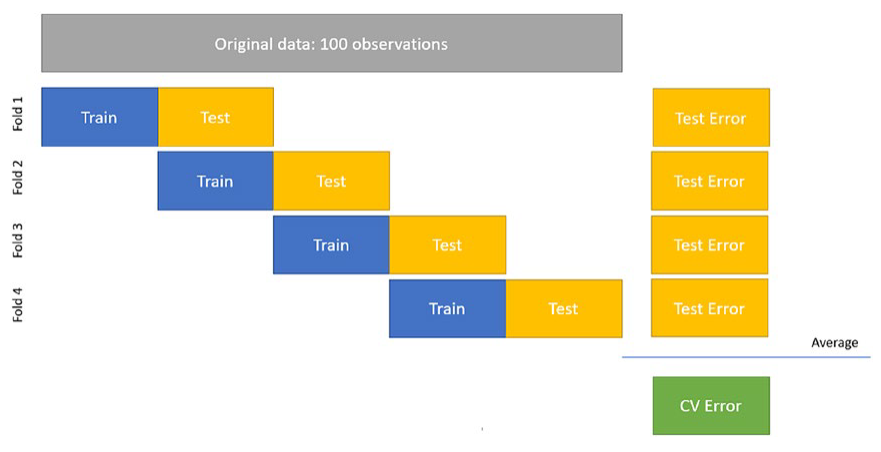

## Listing 2-11 Rolling Time Series Cross-Valdiation in Python.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(max_train_size = 2)

errors = []
for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]

    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)

print(np.mean(errors))
